In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/NASA/datasets/"

data = pd.read_csv(data_path + "KOI.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [4]:
# List of required features
features = [
    'koi_period',
    'koi_duration',
    'koi_depth',
    'koi_prad',
    'koi_teq',
    'koi_insol',
    'koi_model_snr',
    'koi_steff',
    'koi_slogg',
    'koi_srad'
]

# Label column
label = 'koi_disposition'

# Create a new DataFrame with only features + label
ml_data = data[features + [label]]

# Display first few rows to check
ml_data

,koi_period,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_disposition
0,9.488036,2.95750,616.0,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,CONFIRMED
1,54.418383,4.50700,875.0,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,CONFIRMED
2,19.899140,1.78220,10800.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,CANDIDATE
3,1.736952,2.40641,8080.0,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,FALSE POSITIVE
4,2.525592,1.65450,603.0,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,CONFIRMED
...,...,...,...,...,...,...,...,...,...,...,...
9559,0.527699,3.22210,1580.0,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,FALSE POSITIVE
9560,1.739849,3.11400,48.5,0.72,1608.0,1585.81,10.6,6119.0,4.444,1.031,CANDIDATE
9561,0.681402,0.86500,104.0,1.07,2218.0,5713.41,12.3,6173.0,4.447,1.041,FALSE POSITIVE
9562,333.486169,3.19900,639.0,19.30,557.0,22.68,14.0,4989.0,2.992,7.824,CANDIDATE


In [5]:
#ml_data.to_csv("/content/drive/MyDrive/Colab Notebooks/NASA/datasets/KOI_Orginal.csv", index=False)

### Data Analysis

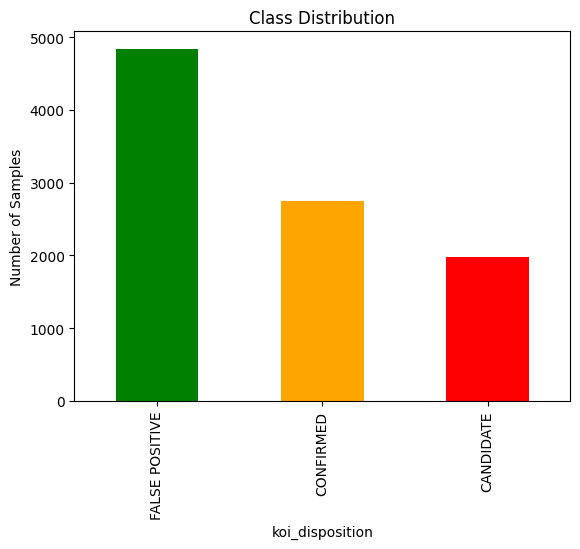

In [6]:
ml_data['koi_disposition'].value_counts().plot(kind='bar', color=['green','orange','red'])
plt.title("Class Distribution")
plt.ylabel("Number of Samples")
plt.show()

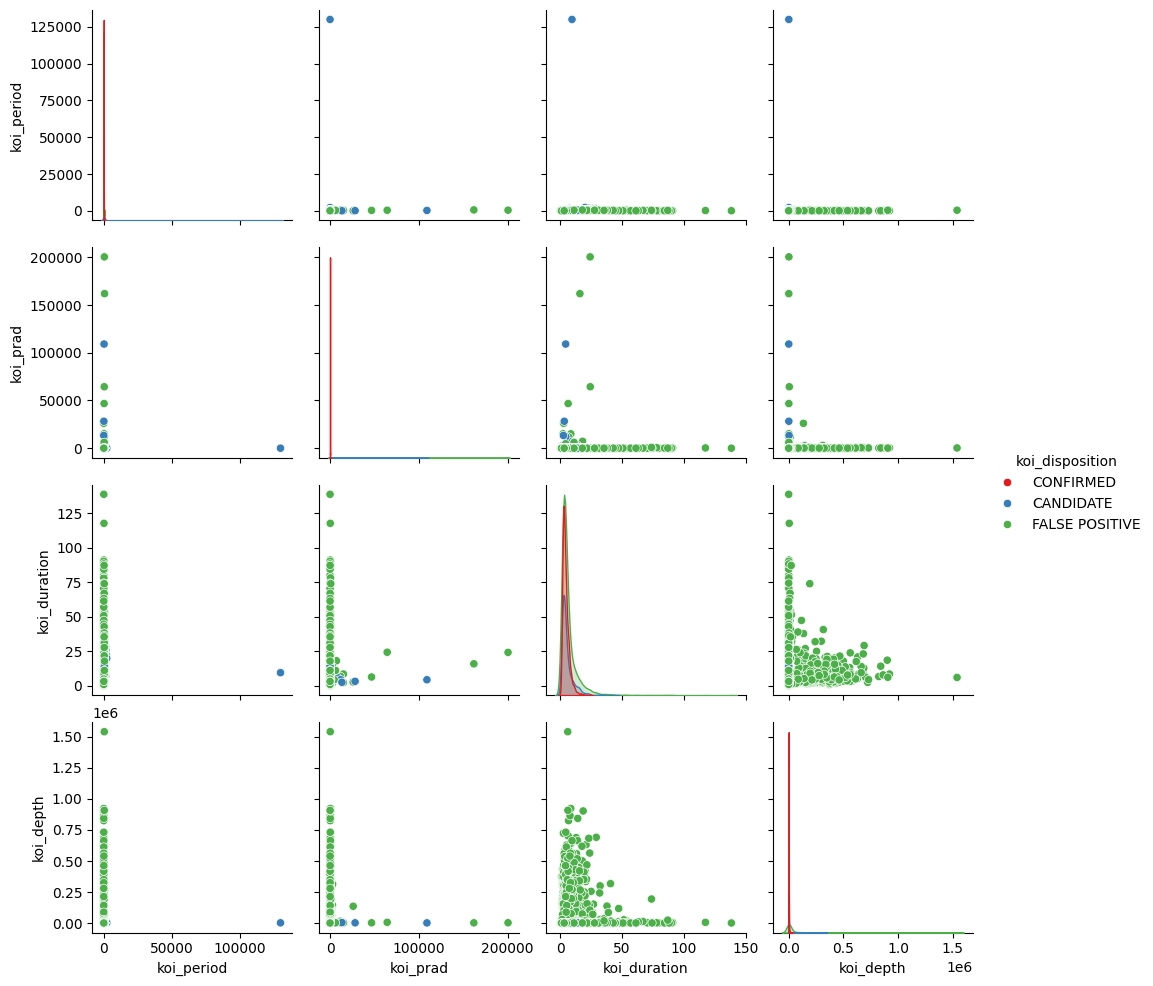

In [7]:
import seaborn as sns

features = ['koi_period', 'koi_prad', 'koi_duration', 'koi_depth']
sns.pairplot(ml_data, vars=features, hue='koi_disposition', palette='Set1')
plt.show()

### Handling Missing Values

In [8]:
features = ml_data.drop('koi_disposition', axis=1)  # numeric columns only
label = ml_data['koi_disposition']                  # string labels

# Step 2: Handle missing values in numeric features
features = features.fillna(features.median())

### Encoding the labels

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(label)

In [10]:
label

array([1, 1, 0, ..., 2, 0, 2])

### Train/Test Split

In [67]:
X = ml_data.drop('koi_disposition', axis=1)
y = ml_data['koi_disposition']

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [69]:
X_train.head()

,koi_period,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad
7048,85.569222,4.9540,539.0,6.85,536.0,19.51,18.2,5361.0,3.856,1.951
5954,2.189093,5.1128,1870.0,33.45,1446.0,1034.43,150.7,6106.0,4.487,0.966
4623,2.635277,1.9970,70.4,0.76,1136.0,394.32,10.7,5215.0,4.496,0.864
4367,7.537375,3.9660,41.1,0.93,1210.0,506.84,11.3,6483.0,4.206,1.436
4833,0.933157,2.6140,87.8,7.29,2202.0,5565.35,15.2,6499.0,4.378,1.169


In [70]:
(len(X_train),len(y_train)),(len(X_test),len(y_test))

((7651, 7651), (1913, 1913))

### Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
X_train[0]

array([ 0.18001294, -0.10623337, -0.28093109, -0.0301047 , -0.63355341,
       -0.04804745, -0.30126744, -0.43147484, -1.06463595,  0.03583487])

### Training the model

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

     CANDIDATE       0.57      0.50      0.53       396
     CONFIRMED       0.81      0.82      0.81       549
FALSE POSITIVE       0.82      0.85      0.83       968

      accuracy                           0.77      1913
     macro avg       0.73      0.72      0.73      1913
  weighted avg       0.76      0.77      0.77      1913



In [77]:
a = y_pred == y_test
cnt = 0
for i in a[:200]:
  if i == False:
    cnt+=1
cnt



54

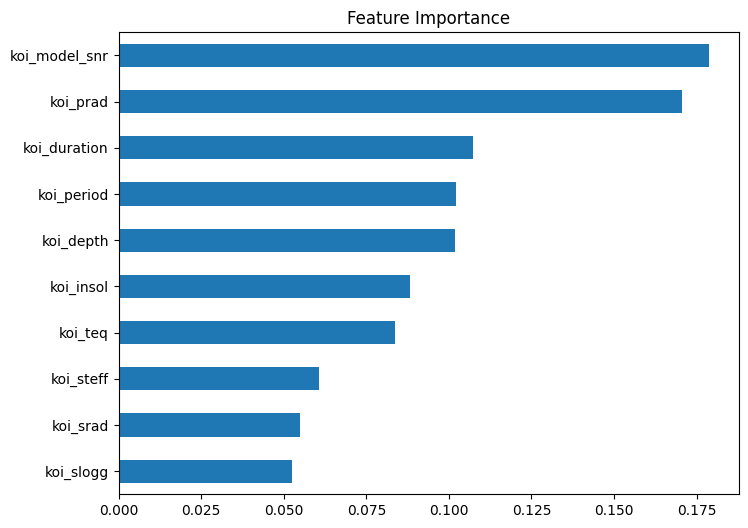

In [18]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()


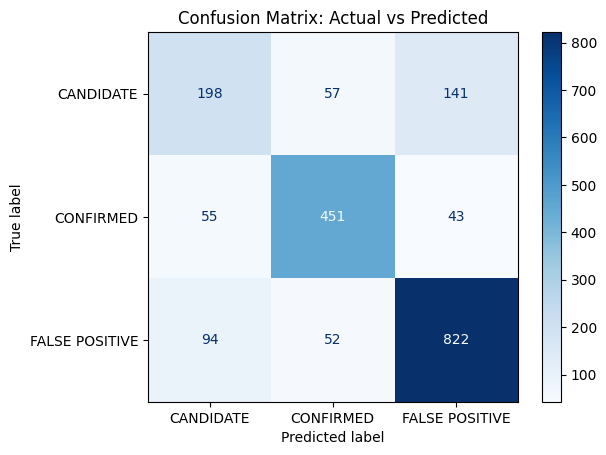

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred exist
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Actual vs Predicted")
plt.show()


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))


                precision    recall  f1-score   support

     CANDIDATE       0.57      0.50      0.53       396
     CONFIRMED       0.81      0.82      0.81       549
FALSE POSITIVE       0.82      0.85      0.83       968

      accuracy                           0.77      1913
     macro avg       0.73      0.72      0.73      1913
  weighted avg       0.76      0.77      0.77      1913



## EXOPLANET MODEL WITH COMBINED DATASETS

In [21]:
drive.mount('/content/drive')
new_data_path = "/content/drive/MyDrive/Colab Notebooks/NASA/datasets/cleaned_training_data.csv"

datas = pd.read_csv(data_path + "cleaned_training_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-867736709.py:4: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  datas = pd.read_csv(data_path + "cleaned_training_data.csv")


In [22]:
datas.head()

,object_name,kepler_name,disposition,koi_pdisposition,orbital_period,transit_depth,planet_radius,koi_teq,koi_insol,stellar_teff,...,ra,dec,pl_name,pl_letter,pl_eqt,st_mass,orbital_period_log,planet_radius_category,stellar_teff_category,stellar_density
0,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,9.488036,615.8,2.26,793.0,93.59,5455.0,...,160.866036,5.874619,NaN,NaN,NaN,NaN,2.350235,Sub-Neptune,G-dwarf,1.153656
1,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,54.418383,874.8,2.83,443.0,9.11,5455.0,...,160.866036,5.874619,NaN,NaN,NaN,NaN,4.014911,Sub-Neptune,G-dwarf,1.153656
2,K00753.01,NaN,CANDIDATE,CANDIDATE,19.899140,10829.0,14.60,638.0,39.30,5853.0,...,160.866036,5.874619,NaN,NaN,NaN,NaN,3.039708,Jupiter-size,G-dwarf,1.469482
3,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,1.736952,8079.2,33.46,1395.0,891.96,5805.0,...,160.866036,5.874619,NaN,NaN,NaN,NaN,1.006845,Jupiter-size,G-dwarf,1.689183
4,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,2.525592,603.3,2.75,1406.0,926.16,6031.0,...,160.866036,5.874619,NaN,NaN,NaN,NaN,1.260048,Sub-Neptune,F-dwarf,0.956795


In [23]:
# Select important features for prediction
important_features = [
    "orbital_period",
    "transit_depth",
    "planet_radius",
    "koi_teq",
    "koi_insol",
    "stellar_teff",
    "stellar_density",
    "disposition"   # target variable
]

# Create a new DataFrame with only the selected features
new_data = datas[important_features]
new_data.head()

,orbital_period,transit_depth,planet_radius,koi_teq,koi_insol,stellar_teff,stellar_density,disposition
0,9.488036,615.8,2.26,793.0,93.59,5455.0,1.153656,CONFIRMED
1,54.418383,874.8,2.83,443.0,9.11,5455.0,1.153656,CONFIRMED
2,19.899140,10829.0,14.60,638.0,39.30,5853.0,1.469482,CANDIDATE
3,1.736952,8079.2,33.46,1395.0,891.96,5805.0,1.689183,FALSE POSITIVE
4,2.525592,603.3,2.75,1406.0,926.16,6031.0,0.956795,CONFIRMED


In [25]:
len(new_data)

16916

In [27]:
# Save the cleaned dataset to a CSV file
new_data.to_csv("/content/drive/MyDrive/Colab Notebooks/NASA/datasets/combined_training.csv", index=False)

print("CSV file saved successfully!")

CSV file saved successfully!


In [36]:
# Check missing values
print(new_data.isnull().sum())



orbital_period     0
transit_depth      0
planet_radius      0
koi_teq            0
koi_insol          0
stellar_teff       0
stellar_density    0
disposition        0
dtype: int64


In [78]:
# Step 1: Separate features and label
features = new_data.drop('disposition', axis=1)  # numeric columns only
label = new_data['disposition']                  # string labels

# Step 2: Handle missing values in numeric features
features = features.fillna(features.median())

# Step 3: Encode the label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(label)

# Step 4: Combine back into ML-ready X, y
X = features
y = label

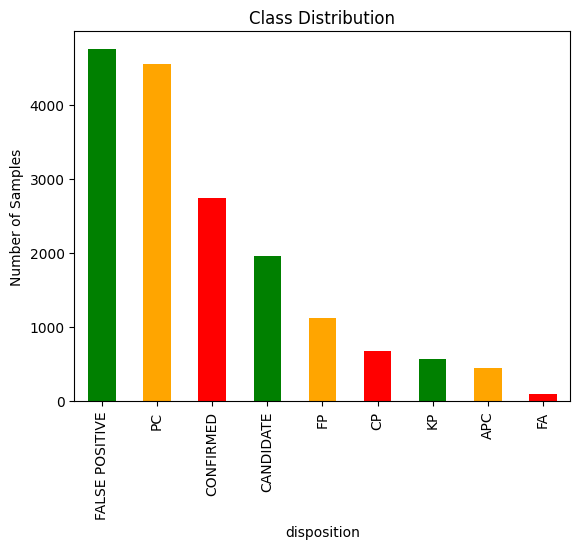

In [79]:

new_data['disposition'].value_counts().plot(kind='bar', color=['green','orange','red'])
plt.title("Class Distribution")
plt.ylabel("Number of Samples")
plt.show()


In [80]:
len(y)

16916

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.04      0.06        91
           1       0.48      0.33      0.39       392
           2       0.68      0.77      0.73       549
           3       0.36      0.25      0.30       135
           4       0.00      0.00      0.00        18
           5       0.78      0.82      0.80       952
           6       0.25      0.17      0.20       224
           7       0.24      0.08      0.12       113
           8       0.63      0.79      0.70       910

    accuracy                           0.63      3384
   macro avg       0.39      0.36      0.37      3384
weighted avg       0.59      0.63      0.61      3384



In [84]:
eval = y_pred == y_test
eval[:100]

array([ True, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True, False, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True])

In [85]:
y_test

array([5, 5, 5, ..., 2, 1, 5])

In [87]:
a = y_pred == y_test
cnt = 0
for i in a[:200]:
  if i == False:
    cnt+=1
cnt


66

In [89]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))
print(class_weights)


{np.int64(0): np.float64(4.164973838104032), np.int64(1): np.float64(0.9589002267573696), np.int64(2): np.float64(0.6843675719415364), np.int64(3): np.float64(2.7999172356714257), np.int64(4): np.float64(20.31831831831832), np.int64(5): np.float64(0.39515257701854284), np.int64(6): np.float64(1.6762046327263718), np.int64(7): np.float64(3.3191071866568556), np.int64(8): np.float64(0.41306471306471304)}


In [91]:
from xgboost import XGBClassifier

model_2 = XGBClassifier(
    scale_pos_weight=1,  # can set different weights per class
    eval_metric="mlogloss",
    use_label_encoder=False
)
model_2.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:10:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [92]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.01      0.02        91
           1       0.50      0.37      0.43       392
           2       0.71      0.78      0.74       549
           3       0.43      0.21      0.28       135
           4       0.00      0.00      0.00        18
           5       0.79      0.83      0.81       952
           6       0.43      0.14      0.21       224
           7       0.22      0.02      0.03       113
           8       0.63      0.92      0.75       910

    accuracy                           0.67      3384
   macro avg       0.43      0.36      0.36      3384
weighted avg       0.62      0.67      0.63      3384

